                   ┌─┐                                                    
q_0: ──────────────┤M├────────────────────────────────────────────────────
     ┌────────────┐└╥┘     ┌─┐                                            
q_1: ┤ Ry(2.5367) ├─╫──────┤M├────────────────────────────────────────────
     ├────────────┤ ║ ┌───┐└╥┘                     ┌─┐                    
q_2: ┤ Ry(2.5367) ├─╫─┤ T ├─╫──────────────────────┤M├────────────────────
     ├────────────┤ ║ ├───┤ ║ ┌───────────────────┐└╥┘              ┌─┐   
q_3: ┤ Ry(2.5367) ├─╫─┤ T ├─╫─┤ R(0.85191,2.1725) ├─╫───────────────┤M├───
     ├────────────┤ ║ ├───┤ ║ ├───────────────────┤ ║ ┌────────────┐└╥┘┌─┐
q_4: ┤ Ry(2.5367) ├─╫─┤ T ├─╫─┤ R(0.85191,2.1725) ├─╫─┤ Rx(2.0042) ├─╫─┤M├
     └────────────┘ ║ └───┘ ║ └───────────────────┘ ║ └────────────┘ ║ └╥┘
c: 5/═══════════════╩═══════╩═══════════════════════╩════════════════╩══╩═
                    0       1                       2                3  4 
['RY(145.35)', 'T', 'R(48

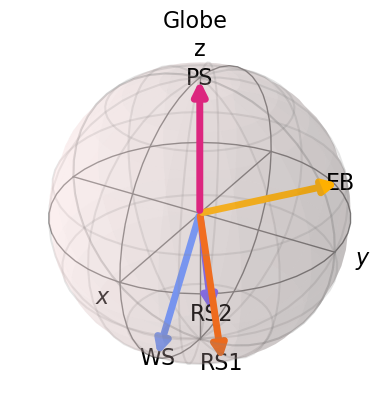

In [57]:
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_state_qsphere
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np
import random
import cmath

# Create quantum registers
qreg = QuantumRegister(5, 'q')
creg = ClassicalRegister(5, 'c')

circuit = QuantumCircuit(qreg, creg)

# PUT EACH STATION ON A SPARATLY QUANTUM CIRCUIT
# Polar station
q1 = QuantumRegister(1, 'Polar Station')
PS = QuantumCircuit(q1)
# "Warehouse and store"
q2 = QuantumRegister(1, 'Warehouse and store')
WS = QuantumCircuit(q2)
# "refueling station 1"
q3 = QuantumRegister(1, 'Refueling station 1')
RS1 = QuantumCircuit(q3)
# refueling station 2
q4 = QuantumRegister(1, 'Refueling station 3')
RS2 = QuantumCircuit(q4)
# expedition base
q5 = QuantumRegister(1, 'Expedition base')
EB = QuantumCircuit(q5)

stations = [PS, WS, RS1, RS2, EB]

theta_rx = random.uniform(0, 2 * np.pi)
theta_ry = random.uniform(0, 2 * np.pi)
lamba_rz = random.uniform(0, 2 * np.pi)
theta_r = random.uniform(0, 2 * np.pi)
phi_r = random.uniform(0, 2 * np.pi)

theta_u = random.uniform(0, 2 * np.pi)
phi_u = random.uniform(0, 2 * np.pi)
lamda_u = random.uniform(0, 2 * np.pi)

rotations = ['rx', 'ry', 'rz', 'u', 'R', 'T']  # List of virtual rotational gates
random.shuffle(rotations)  # Randomly the position of the virtuas rotational gate in the list

gate_list = []

"Polar station to warehouse and store"
if rotations[0] == 'rx':
    for station in stations[1:]:
        station.rx(theta_rx, 0)
    for i in range(1, 5):
        circuit.rx(theta_rx, qreg[i])
    angle = str(round(theta_rx * 180 / np.pi, 2))
    gate = "RX(" + angle + ")"
    gate_list.append(gate)

elif rotations[0] == 'ry':
    for station in stations[1:]:
        station.ry(theta_ry, 0)
    for i in range(1, 5):
        circuit.ry(theta_ry, qreg[i])
    angle = str(round(theta_ry * 180 / np.pi, 2))
    gate = "RY(" + angle + ")"
    gate_list.append(gate)

elif rotations[0] == 'rz':
    for station in stations[1:]:
        station.rz(lamba_rz, 0)
    for i in range(1, 5):
        circuit.rz(lamba_rz, qreg[i])
    angle = str(round(lamba_rz * 180 / np.pi, 2))
    gate = "RZ(" + angle + ")"
    gate_list.append(gate)

elif rotations[0] == 'u':
    for station in stations[1:]:
        station.u(theta_u, phi_u, lamda_u, 0)
    for i in range(1, 5):
        circuit.u(theta_u, phi_u, lamda_u, qreg[i])
    angle = str(round(theta_u * 180 / np.pi)) + ',' + str(round(phi_u * 180 / np.pi)) + ',' + str(
        round(lamda_u * 180 / np.pi, 2))
    gate = "U(" + angle + ")"
    gate_list.append(gate)

elif rotations[0] == 'R':
    for station in stations[1:]:
        station.r(theta_r, phi_r, 0)
    for i in range(1, 5):
        circuit.r(theta_r, phi_r, qreg[i])
    angle = str(round(theta_r * 180 / np.pi, 2)) + ',' + str(round(phi_r * 180 / np.pi, 2))
    gate = "R(" + angle + ")"
    gate_list.append(gate)
else:

    for station in stations[1:]:
        station.t(0)
    for i in range(1, 5):
        circuit.t(qreg[i])
    gate = "T"
    gate_list.append(gate)

"warehouse and store to refueling station 1"
if rotations[1] == 'rx':
    for station in stations[2:]:
        station.rx(theta_rx, 0)
    for i in range(2, 5):
        circuit.rx(theta_rx, qreg[i])
    angle = str(round(theta_rx * 180 / np.pi, 2))
    gate = "RX(" + angle + ")"
    gate_list.append(gate)

elif rotations[1] == 'ry':
    for station in stations[2:]:
        station.ry(theta_ry, 0)
    for i in range(2, 5):
        circuit.ry(theta_ry, qreg[i])
    angle = str(round(theta_ry * 180 / np.pi, 2))
    gate = "RY(" + angle + ")"
    gate_list.append(gate)

elif rotations[1] == 'rz':
    for station in stations[2:]:
        station.rz(lamba_rz, 0)
    for i in range(2, 5):
        circuit.rz(lamba_rz, qreg[i])
    angle = str(round(lamba_rz * 180 / np.pi, 2))
    gate = "RZ(" + angle + ")"
    gate_list.append(gate)

elif rotations[1] == 'u':
    for station in stations[2:]:
        station.u(theta_u, phi_u, lamda_u, 0)
    for i in range(2, 5):
        circuit.u(theta_u, phi_u, lamda_u, qreg[i])
    angle = str(round(theta_u * 180 / np.pi, 2)) + ',' + str(round(phi_u * 180 / np.pi, 2)) + ',' + str(
        round(lamda_u * 180 / np.pi, 2))
    gate = "U(" + angle + ")"
    gate_list.append(gate)

elif rotations[1] == 'R':
    for station in stations[2:]:
        station.r(theta_r, phi_r, 0)
    for i in range(2, 5):
        circuit.r(theta_r, phi_r, qreg[i])
    angle = str(round(theta_r * 180 / np.pi, 2)) + ',' + str(round(phi_r * 180 / np.pi, 2))
    gate = "R(" + angle + ")"
    gate_list.append(gate)

else:
    for station in stations[2:]:
        station.t(0)
    for i in range(2, 5):
        circuit.t(qreg[i])
    gate = "T"
    gate_list.append(gate)

"refueling station 1 to refueling station 2"
if rotations[2] == 'rx':
    for station in stations[3:]:
        station.rx(theta_rx, 0)
    for i in range(3, 5):
        circuit.rx(theta_rx, qreg[i])
    angle = str(round(theta_rx * 180 / np.pi, 2))
    gate = "RX(" + angle + ")"
    gate_list.append(gate)

elif rotations[2] == 'ry':
    for station in stations[3:]:
        station.ry(theta_ry, 0)
    for i in range(3, 5):
        circuit.ry(theta_ry, qreg[i])
    angle = str(round(theta_ry * 180 / np.pi, 2))
    gate = "RY(" + angle + ")"
    gate_list.append(gate)

elif rotations[2] == 'rz':
    for station in stations[3:]:
        station.rz(lamba_rz, 0)
    for i in range(3, 5):
        circuit.rz(lamba_rz, qreg[i])
    angle = str(round(lamba_rz * 180 / np.pi, 2))
    gate = "RZ(" + angle + ")"
    gate_list.append(gate)

elif rotations[2] == 'u':
    for station in stations[3:]:
        station.u(theta_u, phi_u, lamda_u, 0)
    for i in range(3, 5):
        circuit.u(theta_u, phi_u, lamda_u, qreg[i])
    angle = str(round(theta_u * 180 / np.pi, 2)) + ',' + str(round(phi_u * 180 / np.pi, 2)) + ',' + str(
        round(lamda_u * 180 / np.pi, 2))
    gate = "U(" + angle + ")"
    gate_list.append(gate)

elif rotations[2] == 'R':
    for station in stations[3:]:
        station.r(theta_r, phi_r, 0)
    for i in range(3, 5):
        circuit.r(theta_r, phi_r, qreg[i])
    angle = str(round(theta_r * 180 / np.pi, 2)) + ',' + str(round(phi_r * 180 / np.pi, 2))
    gate = "R(" + angle + ")"
    gate_list.append(gate)

else:
    for station in stations[3:]:
        station.t(0)
    for i in range(3, 5):
        circuit.t(qreg[i])
    gate = "T"
    gate_list.append(gate)

"refueling station 2 to expedition base"
if rotations[3] == 'rx':
    stations[4].rx(theta_rx, 0)
    circuit.rx(theta_rx, qreg[4])
    angle = str(round(theta_rx * 180 / np.pi, 2))
    gate = "RX(" + angle + ")"
    gate_list.append(gate)

elif rotations[3] == 'ry':
    stations[4].ry(theta_ry, 0)
    circuit.ry(theta_ry, qreg[4])
    angle = str(round(theta_ry * 180 / np.pi, 2))
    gate = "RY(" + angle + ")"
    gate_list.append(gate)
elif rotations[3] == 'rz':
    stations[4].rz(lamba_rz, 0)
    circuit.rz(lamba_rz, qreg[4])
    angle = str(round(lamba_rz * 180 / np.pi, 2))
    gate = "RZ(" + angle + ")"
    gate_list.append(gate)

elif rotations[3] == 'u':
    stations[4].u(theta_u, phi_u, lamda_u, 0)
    circuit.u(theta_u, phi_u, lamda_u, qreg[4])
    angle = str(round(theta_u * 180 / np.pi, 2)) + ',' + str(round(phi_u * 180 / np.pi, 2)) + ',' + str(
        round(lamda_u * 180 / np.pi, 2))
    gate = "U(" + angle + ")"
    gate_list.append(gate)

elif rotations[3] == 'R':
    stations[4].r(theta_r, phi_r, 0)
    circuit.r(theta_r, phi_r, qreg[4])
    angle = str(round(theta_r * 180 / np.pi, 2)) + ',' + str(round(phi_r * 180 / np.pi, 2))
    gate = "R(" + angle + ")"
    gate_list.append(gate)

else:
    stations[4].t(0)
    circuit.t(qreg[4])
    gate = "T"
    gate_list.append(gate)

plot_bloch_multivector(circuit).savefig("many_stations.png", dpi=40)
circuit.measure(qreg, creg)
print(circuit)

print(gate_list)

random_gate_list = random.sample(gate_list, len(gate_list))  # Randomly the gates position in the gate list
print(random_gate_list)


# Simaulate and get the statevector result for each station
def vector_state(circuit):
    backend = Aer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    statevector = result.get_statevector()

    return statevector


# get the caartesians coordinates for each stations
def caartesians_coordinates(statevector):
    x = 2 * (statevector[0] * np.conjugate(statevector[1])).real
    y = 2 * (-statevector[0] * np.conjugate(statevector[1])).imag
    z = np.linalg.norm(statevector[0]) ** 2 - np.linalg.norm(statevector[1]) ** 2

    return [x, y, z]


# get the globe who is represent by the bloch sphere with multi-statevectors

# statevector on the Bloch sphere for each station
ps = vector_state(PS)
ws = vector_state(WS)
rs1 = vector_state(RS1)
rs2 = vector_state(RS2)
eb = vector_state(EB)

# VISUALIZATION
bloch_states = {
    "PS": caartesians_coordinates(ps),
    "WS": caartesians_coordinates(ws),
    "RS1": caartesians_coordinates(rs1),
    "RS2": caartesians_coordinates(rs2),
    "EB": caartesians_coordinates(eb)
}

import matplotlib.pyplot as plt
from qiskit.visualization.bloch import Bloch


def plot_bloch_multiple_vector(bloch_data, title='Globe', font_size=16):
    fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

    B = Bloch(axes=ax, font_size=font_size)
    B.zlabel = ['z', '']

    for key, value in bloch_data.items():
        B.add_vectors([value])
        B.add_annotation(value, key)

    B.render(title=title)

    return fig.savefig('Globe.png', dpi=90)

#matrix that represent the rotational gate for one station to another
matrix1 = np.outer(ps, ws)
matrix2 = np.outer(ws, rs1)
matrix3 = np.outer(rs1, rs2)
matrix4 = np.outer(rs2, eb)
#print(matrix1)

#GET STATE VECTOR
WS_state = 'WS = '+ str(np.round(ws[0], 2))+'|0> + ' + str(np.round(ws[1], 2))+'|1>'
RS1_state = 'WS1 = '+ str(np.round(rs1[0], 2))+'|0> + ' + str(np.round(rs1[1], 2))+'|1>'
RS2_state = 'WS2 = '+ str(np.round(rs2[0], 2))+'|0> + ' + str(np.round(rs2[1], 2))+'|1>'
EB_state = 'EB = '+ str(np.round(eb[0], 2))+'|0> + ' + str(np.round(eb[1], 2))+'|1>'


#STATION STATE VISIALIZATION
plot_state_qsphere(ws).savefig('ws.png', dpi=15)
plot_state_qsphere(rs1).savefig('rs1.png', dpi=15)
plot_state_qsphere(rs2).savefig('rs2.png', dpi=15)
plot_state_qsphere(eb).savefig('eb.png', dpi=15)


#Multibloch vector visualization
plot_bloch_multiple_vector(bloch_states)

In [59]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_state_qsphere
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_state_city
from qiskit.tools.visualization import circuit_drawer
import random
import numpy as np

import sys
import pygame
import time

pygame.init()

screen_width = 1000
screen_height = 650
screen = pygame.display.set_mode((screen_width, screen_height))
clock = pygame.time.Clock()
pygame.display.set_caption("QUANTUM POLAR STATION GAME")
#screen.fill((120, 120, 120))


#GLOBE OBJETC AND ROUTE

# Get caartesians coordinates
import cmath


#PYGAME INTERFACE
globe = pygame.image.load('Globe.png')
stations = pygame.image.load("many_stations.png")
ws_info = pygame.image.load('ws.png')
rs1_info = pygame.image.load('rs1.png')
rs2_info = pygame.image.load('rs2.png')
eb_info = pygame.image.load('eb.png')

X = (screen_width - globe.get_width())/2
Y = (screen_height - globe.get_height())/2
#print(x,y)
# Display the globe image on the Pygame screen
screen.fill((120, 120, 120))
screen.blit(globe, (X,Y+40)) #Main image

#Display the stations on the pygame screen
screen.blit(stations, ((screen_width - stations.get_width())/2, 5))

#Button class
button_width = 230
button_height = 40
class Button:
    def __init__(self, x, y, button_width , button_height, color, text):
        self.rect = pygame.Rect(x, y, button_width, button_height)
        self.color = color
        self.text = text

    def draw(self, screen):
        pygame.draw.rect(screen, self.color, self.rect)
        font = pygame.font.Font(None, 30)
        text_surface = font.render(self.text, True, (255, 255, 255))
        text_rect = text_surface.get_rect(center=self.rect.center)
        screen.blit(text_surface, text_rect)

    def is_clicked(self, event):
        if event.type == pygame.MOUSEBUTTONDOWN:
            #mouse_pos = pygame.mouse.get_pos()
            if self.rect.collidepoint(event.pos):
                return True
            return False

#Create Button:
button_x = [30, 270, 510,750]
button_y = screen_height-(button_height+12)
button1 = Button(button_x[0], button_y, button_width, button_height, (80, 80, 80), random_gate_list[0])
button2 = Button(button_x[1], button_y, button_width, button_height, (80, 80, 80), random_gate_list[1])
button3 = Button(button_x[2], button_y, button_width, button_height, (80, 80, 80), random_gate_list[2])
button4 = Button(button_x[3], button_y, button_width, button_height, (80, 80, 80), random_gate_list[3])
button = [button1, button2, button4, button4]
# Set the position and size of the rectangle
a1 = (screen_width - stations.get_width())/2 + 60
a2 = a1 + 105
a3 = a2 + 105
a4 = a3 + 105
a5 = a4 + 105
x = a1
b = 25
rect_width = 120
rect_height = 90
# Text info coordinate
x_info, y_info = 130, 160

def decission0():
    text = font.render('Good choice!', True, (10, 250, 10))
    screen.blit(text, (420, 160))
    pygame.display.update()
    time.sleep(0.5)
def decission1():
    text = font.render('Wrong choice!', True, (250, 10, 10))
    screen.blit(text, (600, 200))
    pygame.display.update()
    time.sleep(0.5)
    

# Pygame events
speed = 1

# Load the song
good_choice_song = pygame.mixer.Sound("good_choice.wav")
wrong_choice_song = pygame.mixer.Sound("wrog_choice.wav")
game_succefull_song = pygame.mixer.Sound("succefull.wav")

font = pygame.font.Font(None, 36)


#INITIALIZATION
if x == a1:
    # Display the station name message
    text = font.render("Polar station", True, (220, 220, 220))
    text_rect = text.get_rect(center=(x_info, y_info))
    screen.blit(text, text_rect)
    pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
while True:
    #
   #Dispaly station information

    y_state_vector = 250
    # Set the font size
    font_size = 36
    # Set the font style
    font_style = pygame.font.Font(None, 18)
    
    #--- State vectors on the Bloch sphere
    text1 =  font_style.render(WS_state, True, (240, 240, 250))
    text1_rect = text1.get_rect(center=(900, y_state_vector))
    screen.blit(text1, text1_rect)

    text2 = font_style.render(RS1_state, True, (240, 240, 250))
    text2_rect = text2.get_rect(center=(900, y_state_vector+40))
    screen.blit(text2, text2_rect)

    text3 = font_style.render(RS2_state, True, (240, 240, 250))
    text3_rect = text3.get_rect(center=(900, y_state_vector+80))
    screen.blit(text3, text3_rect)

    text4 = font_style.render(EB_state, True, (240, 240, 250))
    text4_rect = text4.get_rect(center=(900, y_state_vector+120))
    screen.blit(text4, text4_rect)
    
    #Visulalize the station state amplitude and phase
    y_state = 200
    screen.blit(ws_info, (10, y_state))
    screen.blit(rs1_info, (10, y_state+90))
    screen.blit(rs2_info, (10, y_state+180))
    screen.blit(eb_info, (10, y_state+270))
    
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

        elif event.type == pygame.MOUSEBUTTONDOWN:

            if button1.is_clicked(event):
                if x == a1:
                    # Display the station name message
                    text = font.render("Polar station", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    screen.fill((120, 120, 120))
                    screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                    screen.blit(globe, (X, Y + 40))
                    screen.blit(ws_info, (10, 200))
                    pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                    pygame.display.update()
                    #Control loop to mouve to another station
                    if button1.text == gate_list[0]:
                        decission0()
                        good_choice_song.play()
                        while x < a2:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a2:
                    # Display the station name message
                    text = font.render("Warehouse and store", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button1.text == gate_list[1]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a3:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a3:
                    # Display the station name message
                    text = font.render("Refueling station 1", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button1.text == gate_list[2]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a4:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a4:
                    # Display the station name message
                    text = font.render("Refueling station 2", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button1.text == gate_list[3]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a5:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                else:
                    decission1()
                    wrong_choice_song.play()
                #print("Button 1 is clicked")
            else:
                pass

            if button2.is_clicked(event):
                if x == a1:
                    # Display the station name message
                    text = font.render("Polar station", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button2.text == gate_list[0]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a2:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a2:
                    # Display the station name message
                    text = font.render("Warehouse and store", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button2.text == gate_list[1]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a3:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a3:
                    # Display the station name message
                    text = font.render("Refueling station 1", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button2.text == gate_list[2]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a4:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        pass
                elif x == a4:
                    # Display the station name message
                    text = font.render("Refueling station 2", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button2.text == gate_list[3]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a5:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                else:
                    decission1()
                    wrong_choice_song.play()

                #print("Button 2 is clicked")
            else:
                pass
            if button3.is_clicked(event):
                if x == a1:
                    # Display the station name message
                    text = font.render("Polar station", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button3.text == gate_list[0]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a2:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a2:
                    # Display the station name message
                    text = font.render("Warehouse and store", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button3.text == gate_list[1]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a3:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a3:
                    # Display the station name message
                    text = font.render("Refueling station 1", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button3.text == gate_list[2]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a4:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a4:
                    # Display the station name message
                    text = font.render("Refueling station 2", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button3.text == gate_list[3]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a5:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                #print("Button 3 is clicked")
                else:
                    decission1()
                    wrong_choice_song.play()
            else:
                pass
            if button4.is_clicked(event):
                if x == a1:
                    # Display the station name message
                    text = font.render("Polar station", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button4.text == gate_list[0]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a2:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a2:
                    # Display the station name message
                    text = font.render("Warehouse and store", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button4.text == gate_list[1]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a3:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a3:
                    # Display the station name message
                    text = font.render("Refueling station 1", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button4.text == gate_list[2]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a4:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                elif x == a4:
                    # Display the station name message
                    text = font.render("Refueling station 2", True, (220, 220, 220))
                    text_rect = text.get_rect(center=(x_info, y_info))
                    screen.blit(text, text_rect)
                    # Control loop to mouve to another station
                    if button4.text == gate_list[3]:
                        # Display good choice information
                        decission0()
                        good_choice_song.play()
                        while x < a5:
                            x += speed
                            screen.fill((120, 120, 120))
                            screen.blit(stations, ((screen_width - stations.get_width()) / 2, 5))
                            screen.blit(globe, (X,Y+40))
                            pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)
                            pygame.display.update()
                    else:
                        decission1()
                        wrong_choice_song.play()
                #print("Button 4 is clicked")
                else:
                    decission1()
                    wrong_choice_song.play()
            
            if x == a5:
                game_succefull_song.play()
                # Display the station name message
                text = font.render("Expedition base", True, (220, 220, 220))
                text_rect = text.get_rect(center=(x_info, y_info))
                # Display good choice information
                text = font.render("SUCCEFULL GAME", True, (10, 250, 10))
                text_rect = text.get_rect(center=(500, y_info))
                screen.blit(text, text_rect)
            if x == a4:
                # Display the station name message
                text = font.render("Refueling station 2", True, (220, 220, 220))
                text_rect = text.get_rect(center=(x_info, y_info))
                screen.blit(text, text_rect)
            if x == a3:
                # Display the station name message
                text = font.render("Refueling station 1", True, (220, 220, 220))
                text_rect = text.get_rect(center=(x_info, y_info))
                screen.blit(text, text_rect)
            if x == a2:
                # Display the station name message
                text = font.render("Warehouse and store", True, (220, 220, 220))
                text_rect = text.get_rect(center=(x_info, y_info))
                screen.blit(text, text_rect)

            else:
                pass


    #pygame.draw.rect(screen, (200, 100, 100), (x, b, rect_width, rect_height), 6)


    button1.draw(screen)
    button2.draw(screen)
    button3.draw(screen)
    button4.draw(screen)
    clock.tick(50)
    # Update the screen
    # Update the screen

    pygame.display.update()
    pygame.display.flip()


# Quit Pygame
#pygame.quit()

SystemExit: 

In [54]:
#INSTALLATION MATERIALS
!pip install <package_name>

!pip install qiskit
!pip install numpy
!pip install matplotlib
!pip install pygame

La syntaxe de la commande n’est pas correcte.
